In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context('notebook',font_scale=1.5)
sns.set_style('ticks')
%matplotlib inline

In [2]:
import sys
#alter the line below to correspond to your file system
dir_ = '/Users/nickc/Documents/embpy'
sys.path.append(dir_)

In [3]:
import embpy as ep

# Quick Example

### Generate Data

In [4]:
two_yr = 365*2
data = np.sin(np.linspace(0,40*np.pi,two_yr)) +np.random.randn(two_yr)
rng = pd.date_range('1/1/2011', periods=two_yr, freq='d')
S = pd.Series(np.around(data,2),index=rng)

In [5]:
S.head()

2011-01-01   -1.68
2011-01-02    0.17
2011-01-03    0.50
2011-01-04    0.56
2011-01-05    1.18
Freq: D, dtype: float64

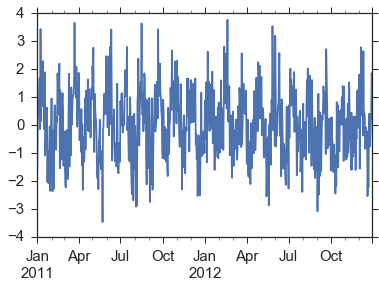

In [6]:
S.plot();

### Set parameters for feature, target, and compare creation

In [7]:
lag_vals = [1,2,3] # what lag values to use for prediction
predict_vals = [1,2,3,4] # how far out to forecast
compare_vals = [0,6,364] #persistance, week before, year before

### Create the embed object and call its methods

In [8]:
E = ep.embed(S) #initiate the object
E.feature_calc(lag_vals, freq='d') 
E.target_calc(predict_vals,freq='d')
E.compare_calc(compare_vals,freq='d')
E.combine() #combine the feature, target, and compare into one big dataframe

### Check out the dataframe

In [9]:
E.X.head(8)

features                   targets                   compare        \
                 00    01    02    03      01    02    03    04      00    06   
2011-01-01    -1.68   NaN   NaN   NaN    0.17  0.50  0.56  1.18   -1.68   NaN   
2011-01-02     0.17 -1.68   NaN   NaN    0.50  0.56  1.18  1.68    0.17   NaN   
2011-01-03     0.50  0.17 -1.68   NaN    0.56  1.18  1.68 -0.15    0.50   NaN   
2011-01-04     0.56  0.50  0.17 -1.68    1.18  1.68 -0.15  3.44    0.56   NaN   
2011-01-05     1.18  0.56  0.50  0.17    1.68 -0.15  3.44  0.14    1.18   NaN   
2011-01-06     1.68  1.18  0.56  0.50   -0.15  3.44  0.14  1.50    1.68   NaN   
2011-01-07    -0.15  1.68  1.18  0.56    3.44  0.14  1.50  1.45   -0.15 -1.68   
2011-01-08     3.44 -0.15  1.68  1.18    0.14  1.50  1.45  1.01    3.44  0.17   

                
           364  
2011-01-01 NaN  
2011-01-02 NaN  
2011-01-03 NaN  
2011-01-04 NaN  
2011-01-05 NaN  
2011-01-06 NaN  
2011-01-07 NaN  
2011-01-08 NaN

# More in Depth

In [10]:
E = ep.embed(S)

In [11]:
E.feature_calc([1,2,3],freq='d')

In [12]:
E.features.head()

,00,01,02,03
2011-01-01,-1.68,NaN,NaN,NaN
2011-01-02,0.17,-1.68,NaN,NaN
2011-01-03,0.50,0.17,-1.68,NaN
2011-01-04,0.56,0.50,0.17,-1.68
2011-01-05,1.18,0.56,0.50,0.17


In [13]:
t_distances = [1,2,3,4] 
E.target_calc(t_distances,freq='d')

In [14]:
E.targets.head()

,01,02,03,04
2010-12-31,-1.68,0.17,0.50,0.56
2011-01-01,0.17,0.50,0.56,1.18
2011-01-02,0.50,0.56,1.18,1.68
2011-01-03,0.56,1.18,1.68,-0.15
2011-01-04,1.18,1.68,-0.15,3.44


In [15]:
E.compare_calc([0,6,364],freq='d')

In [16]:
E.combine()

In [17]:
E.X.head(8)

features                   targets                   compare        \
                 00    01    02    03      01    02    03    04      00    06   
2011-01-01    -1.68   NaN   NaN   NaN    0.17  0.50  0.56  1.18   -1.68   NaN   
2011-01-02     0.17 -1.68   NaN   NaN    0.50  0.56  1.18  1.68    0.17   NaN   
2011-01-03     0.50  0.17 -1.68   NaN    0.56  1.18  1.68 -0.15    0.50   NaN   
2011-01-04     0.56  0.50  0.17 -1.68    1.18  1.68 -0.15  3.44    0.56   NaN   
2011-01-05     1.18  0.56  0.50  0.17    1.68 -0.15  3.44  0.14    1.18   NaN   
2011-01-06     1.68  1.18  0.56  0.50   -0.15  3.44  0.14  1.50    1.68   NaN   
2011-01-07    -0.15  1.68  1.18  0.56    3.44  0.14  1.50  1.45   -0.15 -1.68   
2011-01-08     3.44 -0.15  1.68  1.18    0.14  1.50  1.45  1.01    3.44  0.17   

                
           364  
2011-01-01 NaN  
2011-01-02 NaN  
2011-01-03 NaN  
2011-01-04 NaN  
2011-01-05 NaN  
2011-01-06 NaN  
2011-01-07 NaN  
2011-01-08 NaN